In [116]:
# Import necessary libraries
import pandas as pd
import json

# =============== 1. Load and Clean Data ===============

# Load the JSON file
file_path = './processed_articles_bk_classified_with_types.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame
df = pd.DataFrame(data)

# Filter only related content and drop the column
df = df[df['is_related'] == True]
df = df.drop('is_related', axis=1)

# Convert boolean to 0/1
df['Tiêu đề bao gồm từ khóa'] = df['is_title_contain_shared_future'].astype(int)
df = df.drop('is_title_contain_shared_future', axis=1)

# =============== 2. Transform 'main_keywords' into Standardized Format ===============

def standardize_keywords(keyword_list):
    """Standardize different keyword formats into a consistent dictionary"""
    result = {}
    
    if not isinstance(keyword_list, list):
        return result
        
    for item in keyword_list:
        # Format 1: {"keyword": "name", "count": number}
        if isinstance(item, dict) and 'keyword' in item and 'count' in item:
            result[item['keyword']] = item['count']
            
        # Format 2: {"name": number}
        elif isinstance(item, dict):
            result.update(item)
            
        # Format 3: ["name", number]
        elif isinstance(item, list) and len(item) == 2:
            result[item[0]] = item[1]
    
    return result

def format_keywords_output(keyword_dict):
    """Format the standardized keywords into a readable string"""
    formatted = []
    for key, value in keyword_dict.items():
        if value > 0:  # Only include keywords with value > 0
            formatted.append(f"{key}: {value}")
    return '; '.join(formatted) if formatted else 'No keywords found'

# Apply the standardization and formatting
df['Keywords Present'] = df['main_keywords'].apply(standardize_keywords).apply(format_keywords_output)

# Create individual columns for each keyword
def create_keyword_columns(keyword_dict):
    standard_keywords = [
        "Community of shared future",
        "Belt and Road Initiative",
        "Asian Infrastructure Investment Bank",
        "Global Development Initiative",
        "Global Security Initiative",
        "Global Governance Initiative",
        "Global Civilization Initiative",
        "China's influence",
        "China's soft power",
        "ASIAN perception",
        "China dream"
    ]
    return {keyword: keyword_dict.get(keyword, 0) for keyword in standard_keywords}

# Create separate columns for each keyword
keyword_columns = df['main_keywords'].apply(standardize_keywords).apply(create_keyword_columns)
keyword_df = pd.DataFrame(keyword_columns.tolist(), index=df.index)

# Combine the original DataFrame with keyword columns
df = pd.concat([df, keyword_df], axis=1)

# Drop the original main_keywords column
df = df.drop('main_keywords', axis=1)

df['date'] = pd.to_datetime(df['date'])

# filter the date from September 2023 to October 2024
df = df[(df['date'] >= '2023-09-01') & (df['date'] <= '2024-11-30')]
print(len(df))
# Ensure all numeric columns are in integer format
numeric_columns = keyword_df.columns
df[numeric_columns] = df[numeric_columns].astype(int)

# =============== 3. Export to Excel ===============

# Export DataFrame to Excel file
output_path = 'bangkok_post_articles_filtered.xlsx'
df.to_excel(output_path, index=False)

print(f"Excel file has been created successfully: {output_path}")

185
Excel file has been created successfully: bangkok_post_articles_filtered.xlsx


In [109]:
df

,url,date,content,title,sentiment,article_type,article_type_reason,Tiêu đề bao gồm từ khóa,Keywords Present,Community of shared future,Belt and Road Initiative,Asian Infrastructure Investment Bank,Global Development Initiative,Global Security Initiative,Global Governance Initiative,Global Civilization Initiative,China's influence,China's soft power,ASIAN perception,China dream
0,http://www.thejakartapost.com/opinion/2024/09/...,2024-09-19,# \n\nOpinion\nAcademia\nBroadening the prospe...,Broadening the prospects for shared future of ...,positive,Commentary,The article presents a detailed opinion from t...,1,Community of shared future: 3; Belt and Road I...,3,2,0,2,2,0,0,1,0,0,1
1,https://www.thejakartapost.com/opinion/2024/02...,2024-02-03,# \n\nOpinion\nAcademia\nChina’s diplomacy: Bu...,China’s diplomacy: Building a community with a...,positive,Commentary,The article presents a detailed opinion on Chi...,1,Community of shared future: 5; Belt and Road I...,5,1,0,2,2,2,1,0,0,0,0
2,http://www.thejakartapost.com/opinion/2024/05/...,2024-05-15,"# \n\nOpinion\nAcademia\nChina, Indonesia open...","China, Indonesia open a new chapter of buildin...",positive,Commentary,The article expresses personal viewpoints and ...,1,Community of shared future: 3; Belt and Road I...,3,2,0,2,2,0,0,1,1,0,0
3,http://www.thejakartapost.com/opinion/2024/11/...,2024-11-07,# \n\nOpinion\nAcademia\nA new journey in Chin...,A new journey in China-Indonesia relationship:...,positive,Commentary,The article presents a detailed opinion on the...,1,Community of shared future: 5; Belt and Road I...,5,2,0,1,1,1,0,1,0,0,0
4,http://www.thejakartapost.com/world/2023/10/12...,2023-10-12,# \n\nWorld\nAsia &amp; Pacific\nAhead of BRI ...,"Ahead of BRI anniversary, China unveils white ...",positive,Medium News,The article provides a detailed overview of Ch...,1,Community of shared future: 4; Belt and Road I...,4,1,0,2,2,0,0,0,0,0,0
5,https://www.thejakartapost.com/world/2023/09/2...,2023-09-27,# \n\nWorld\nAsia &amp; Pacific\nChina issues ...,"China issues White Paper on global community, ...",positive,In-depth News,The article provides a detailed analysis of Ch...,1,Community of shared future: 3; Belt and Road I...,3,6,0,1,1,0,0,1,0,0,0
6,http://www.thejakartapost.com/opinion/2023/10/...,2023-10-16,# \n\nOpinion\nAcademia\nA decade of progress:...,A decade of progress: The BRI's global transfo...,positive,Commentary,The article provides a detailed analysis of th...,1,Community of shared future: 3; Belt and Road I...,3,8,0,2,2,0,0,1,1,0,0
7,http://www.thejakartapost.com/opinion/2024/07/...,2024-07-08,# \n\nOpinion\nAcademia\nWorking together in a...,Working together in addressing future challenges,positive,Commentary,The article expresses personal viewpoints on C...,1,Community of shared future: 3; Global Governan...,3,0,0,0,0,2,0,1,1,0,0
8,https://www.thejakartapost.com/opinion/2024/11...,2024-11-13,# \n\nOpinion\nAcademia\nPrabowo’s great power...,Prabowo’s great power politics pivot takes cen...,neutral,Commentary,The article provides an analysis of President ...,1,Community of shared future: 1; China's influen...,1,0,0,0,0,0,0,1,0,0,0
9,http://www.thejakartapost.com/index.php/opinio...,2023-10-16,# \n\nOpinion\nAcademia\nA decade of progress:...,A decade of progress: The BRI's global transfo...,positive,Commentary,The article provides a detailed analysis of th...,1,Community of shared future: 3; Belt and Road I...,3,8,0,2,2,0,0,1,1,0,0


In [7]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 1.7 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.7 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.4 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
Using cached pyparsin

In [118]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
# plt.style.use('seaborn')
sns.set_palette("husl")

# =============== 1. Load and Clean Data ===============

# Load the JSON file
file_path = './processed_articles_bk_classified_with_types.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame
df = pd.DataFrame(data)

# Filter only related content and drop the column
df = df[df['is_related'] == True]
df = df.drop('is_related', axis=1)
print("Total articles: ", len(df))
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# remove the duplicated in df by url
df = df.drop_duplicates(subset='url')

Total articles:  185


In [127]:
df['news_sector'] = df['url'].apply(lambda x: x.split('/')[3])

In [128]:
df

,url,date,content,title,is_title_contain_shared_future,sentiment,main_keywords,article_type,article_type_reason,month_year,news_sector
0,https://www.bangkokpost.com/thailand/general/2...,2024-11-20,"Thailand\nGeneral\nThailand, China set for 'Go...","Thailand, China set for 'Golden Jubilee'",True,positive,"[{'Community of shared future': 1}, {'Communit...",Medium News,The article provides detailed information abou...,2024-11,thailand
1,https://www.bangkokpost.com/thailand/pr/290488...,2024-11-19,Thailand\nPR News\nC.P. Group Partners with Zh...,C.P. Group Partners with Zhejiang University t...,False,positive,[],In-depth News,The article provides detailed information abou...,2024-11,thailand
2,https://www.bangkokpost.com/life/social-and-li...,2024-11-21,Life\nSocial &amp; Lifestyle\nA cultural gem i...,A cultural gem in Macau,False,positive,"[{'keyword': 'Belt and Road Initiative', 'coun...",In-depth News,The article provides a detailed exploration of...,2024-11,life
3,https://www.bangkokpost.com/opinion/opinion/29...,2024-11-14,Opinion\nStablecoins can defend the dollar\nPa...,Stablecoins can defend the dollar,False,negative,"[[Belt and Road Initiative, 1], [China's influ...",Commentary,The article expresses personal viewpoints on t...,2024-11,opinion
4,https://www.bangkokpost.com/world/2897891/chin...,2024-11-07,World\nChina’s premier vows support for Myanma...,China’s premier vows support for Myanmar in ju...,False,concerned,"[[Belt and Road Initiative, 1], [China's influ...",Medium News,The article provides detailed information abou...,2024-11,world
...,...,...,...,...,...,...,...,...,...,...,...
180,https://www.bangkokpost.com/life/tech/2690308/...,2023-11-22,Life\nTech\nHuawei showcases smart city innova...,Huawei showcases smart city innovations,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,life
181,https://www.bangkokpost.com/business/general/2...,2023-10-19,"Business\nGeneral\nVisa waivers for India, Tai...","Visa waivers for India, Taiwan on wish list",False,positive,"[{'keyword': 'Belt and Road Initiative', 'coun...",Medium News,The article provides detailed information abou...,2023-10,business
182,https://www.bangkokpost.com/business/general/2...,2023-11-14,Business\nGeneral\nSrettha pitches land bridge...,Srettha pitches land bridge project in US,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,business
183,https://www.bangkokpost.com/business/general/2...,2023-11-13,Business\nGeneral\nFly Thai Vietjet to Shangha...,Fly Thai Vietjet to Shanghai and Hangzhou from...,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,business


Total articles:  185


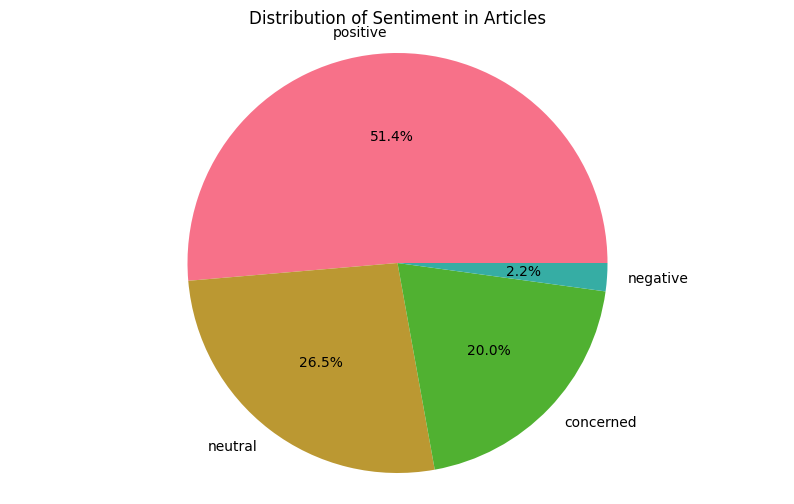

month_year
2023-09     8
2023-10    21
2023-11     8
2023-12     4
2024-01     7
2024-02    10
2024-03    14
2024-04     9
2024-05    10
2024-06     6
2024-07     8
2024-08    16
2024-09    10
2024-10    29
2024-11    25
Freq: M, dtype: int64


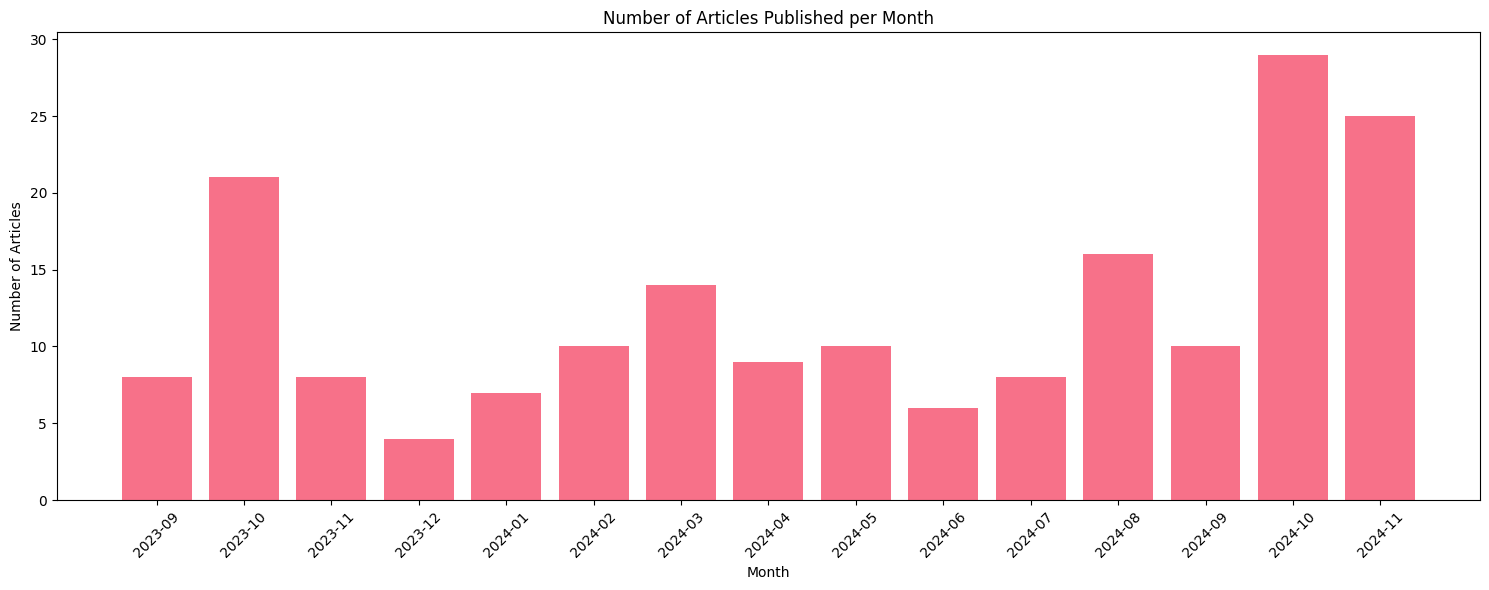

<Figure size 1500x600 with 0 Axes>

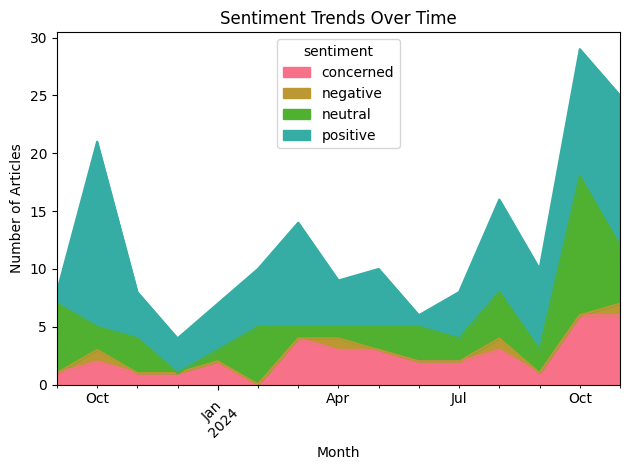

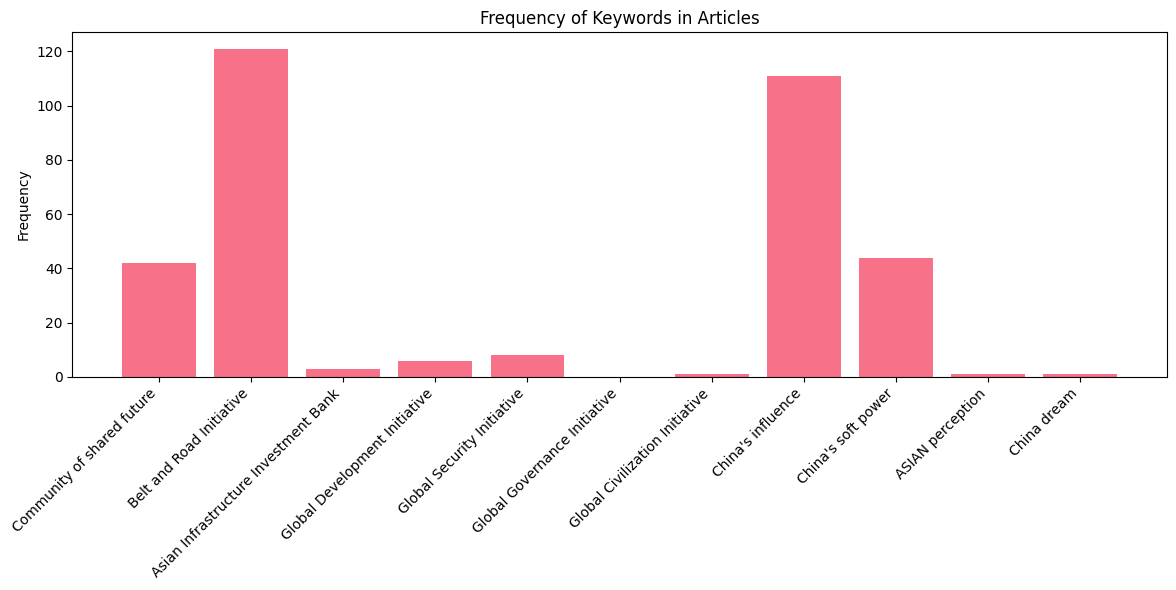


Summary Statistics:
Total number of articles: 185

Sentiment Distribution:
sentiment
positive     95
neutral      49
concerned    37
negative      4
Name: count, dtype: int64

Date Range:
First article: 2023-09-05 00:00:00
Last article: 2024-11-29 00:00:00


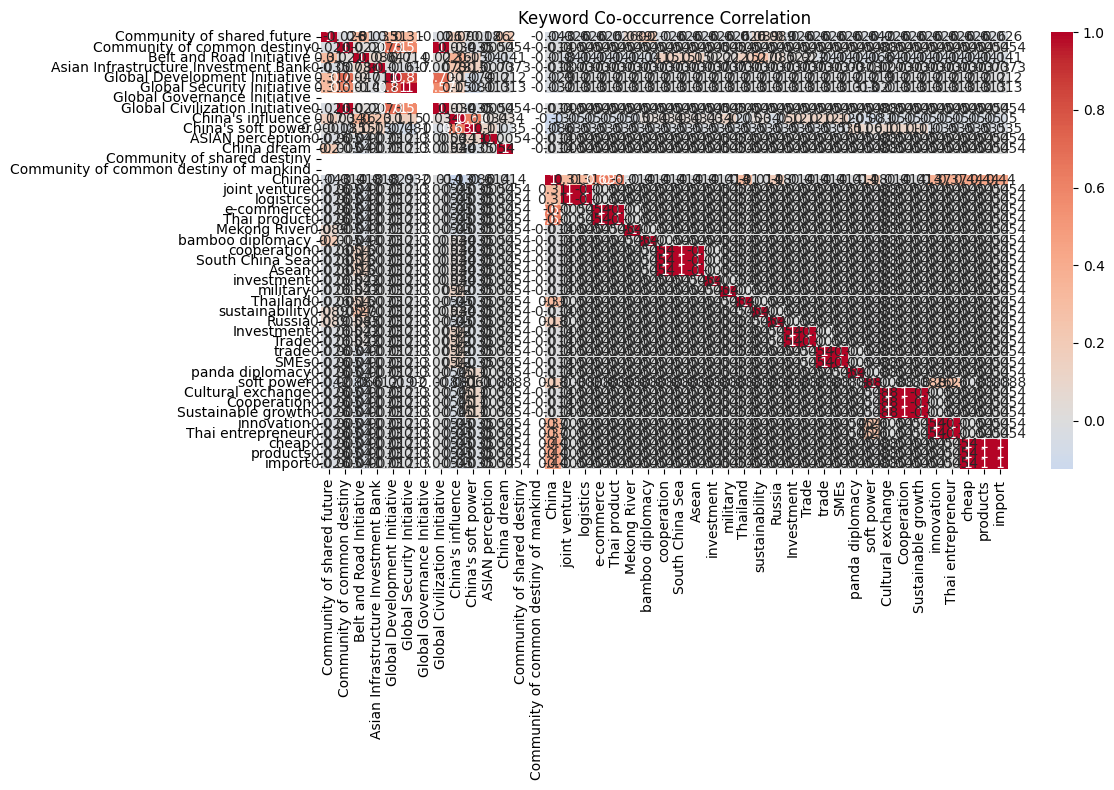

In [129]:

# filter the date from September 2023 to October 2024
df = df[(df['date'] >= '2023-09-01') & (df['date'] <= '2024-11-30')]
print("Total articles: ", len(df))
# =============== 2. Sentiment Analysis Visualization ===============

plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment in Articles')
plt.axis('equal')
plt.show()

# =============== 3. Publishing Date Distribution ===============

# Create monthly distribution
plt.figure(figsize=(15, 6))
df['month_year'] = df['date'].dt.to_period('M')
monthly_counts = df.groupby('month_year').size()
print(monthly_counts)
plt.bar(range(len(monthly_counts)), monthly_counts.values)
plt.xticks(range(len(monthly_counts)), [str(date) for date in monthly_counts.index], rotation=45)
plt.title('Number of Articles Published per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# =============== 4. Sentiment Trends Over Time ===============

# Create sentiment trends
plt.figure(figsize=(15, 6))
sentiment_over_time = df.groupby(['month_year', 'sentiment']).size().unstack(fill_value=0)

# Plot stacked area chart
sentiment_over_time.plot(kind='area', stacked=True)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============== 5. Keyword Analysis ===============

def standardize_keywords(keyword_list):
    """Standardize different keyword formats into a consistent dictionary"""
    result = {}
    if not isinstance(keyword_list, list):
        return result
    for item in keyword_list:
        if isinstance(item, dict) and 'keyword' in item and 'count' in item:
            result[item['keyword']] = item['count']
        elif isinstance(item, dict):
            result.update(item)
        elif isinstance(item, list) and len(item) == 2:
            result[item[0]] = item[1]
    return result

# Create keyword columns
keyword_data = df['main_keywords'].apply(standardize_keywords)
standard_keywords = [
    "Community of shared future",
    "Belt and Road Initiative",
    "Asian Infrastructure Investment Bank",
    "Global Development Initiative",
    "Global Security Initiative",
    "Global Governance Initiative",
    "Global Civilization Initiative",
    "China's influence",
    "China's soft power",
    "ASIAN perception",
    "China dream"
]

# Calculate keyword frequencies
keyword_frequencies = {keyword: sum(d.get(keyword, 0) for d in keyword_data) for keyword in standard_keywords}

# Plot keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_frequencies.keys(), keyword_frequencies.values())
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Keywords in Articles')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# =============== 6. Additional Analysis ===============

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of articles: {len(df)}")
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print("\nDate Range:")
print(f"First article: {df['date'].min()}")
print(f"Last article: {df['date'].max()}")

# Create a heatmap of keyword co-occurrence
keyword_matrix = pd.DataFrame([{k: v for k, v in d.items()} for d in keyword_data])
keyword_matrix = keyword_matrix.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(keyword_matrix.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Keyword Co-occurrence Correlation')
plt.tight_layout()
plt.show()

In [130]:
df['news_sector'].value_counts()


news_sector
thailand    57
business    46
opinion     42
world       36
life         4
Name: count, dtype: int64

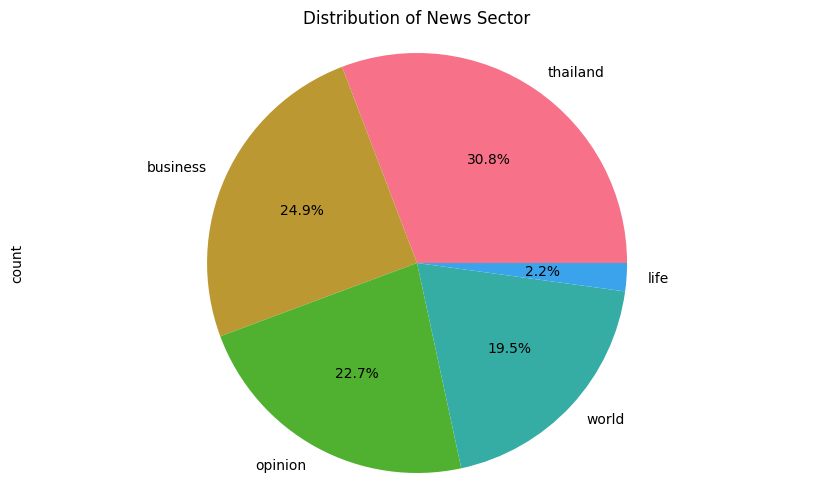

In [131]:
# =============== 7. Visualize news sector as pie chart ===============
# df = df[df['news_sector'].isin(['world', 'opinion', 'business', 'paper'])]
# replace www with general
df['news_sector'] = df['news_sector'].apply(lambda x: x.replace('china-president-xi-jinping-europe-visit-cna-explains-4316201', 'commentary'))
plt.figure(figsize=(10, 6))
df['news_sector'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of News Sector')
plt.axis('equal')
plt.show()


In [132]:
df

,url,date,content,title,is_title_contain_shared_future,sentiment,main_keywords,article_type,article_type_reason,month_year,news_sector
0,https://www.bangkokpost.com/thailand/general/2...,2024-11-20,"Thailand\nGeneral\nThailand, China set for 'Go...","Thailand, China set for 'Golden Jubilee'",True,positive,"[{'Community of shared future': 1}, {'Communit...",Medium News,The article provides detailed information abou...,2024-11,thailand
1,https://www.bangkokpost.com/thailand/pr/290488...,2024-11-19,Thailand\nPR News\nC.P. Group Partners with Zh...,C.P. Group Partners with Zhejiang University t...,False,positive,[],In-depth News,The article provides detailed information abou...,2024-11,thailand
2,https://www.bangkokpost.com/life/social-and-li...,2024-11-21,Life\nSocial &amp; Lifestyle\nA cultural gem i...,A cultural gem in Macau,False,positive,"[{'keyword': 'Belt and Road Initiative', 'coun...",In-depth News,The article provides a detailed exploration of...,2024-11,life
3,https://www.bangkokpost.com/opinion/opinion/29...,2024-11-14,Opinion\nStablecoins can defend the dollar\nPa...,Stablecoins can defend the dollar,False,negative,"[[Belt and Road Initiative, 1], [China's influ...",Commentary,The article expresses personal viewpoints on t...,2024-11,opinion
4,https://www.bangkokpost.com/world/2897891/chin...,2024-11-07,World\nChina’s premier vows support for Myanma...,China’s premier vows support for Myanmar in ju...,False,concerned,"[[Belt and Road Initiative, 1], [China's influ...",Medium News,The article provides detailed information abou...,2024-11,world
...,...,...,...,...,...,...,...,...,...,...,...
180,https://www.bangkokpost.com/life/tech/2690308/...,2023-11-22,Life\nTech\nHuawei showcases smart city innova...,Huawei showcases smart city innovations,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,life
181,https://www.bangkokpost.com/business/general/2...,2023-10-19,"Business\nGeneral\nVisa waivers for India, Tai...","Visa waivers for India, Taiwan on wish list",False,positive,"[{'keyword': 'Belt and Road Initiative', 'coun...",Medium News,The article provides detailed information abou...,2023-10,business
182,https://www.bangkokpost.com/business/general/2...,2023-11-14,Business\nGeneral\nSrettha pitches land bridge...,Srettha pitches land bridge project in US,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,business
183,https://www.bangkokpost.com/business/general/2...,2023-11-13,Business\nGeneral\nFly Thai Vietjet to Shangha...,Fly Thai Vietjet to Shanghai and Hangzhou from...,False,positive,[],Medium News,The article provides detailed information abou...,2023-11,business



Network Statistics:
Number of nodes: 40
Number of edges: 89

Top 5 most frequent keywords:
Belt and Road Initiative: 121 occurrences
China's influence: 111 occurrences
China's soft power: 44 occurrences
Community of shared future: 42 occurrences
China: 39 occurrences

Most common co-occurrences:
Belt and Road Initiative - China's influence: 52 co-occurrences
China's influence - China's soft power: 34 co-occurrences
Belt and Road Initiative - China's soft power: 25 co-occurrences
Community of shared future - China's influence: 20 co-occurrences
Community of shared future - Belt and Road Initiative: 15 co-occurrences


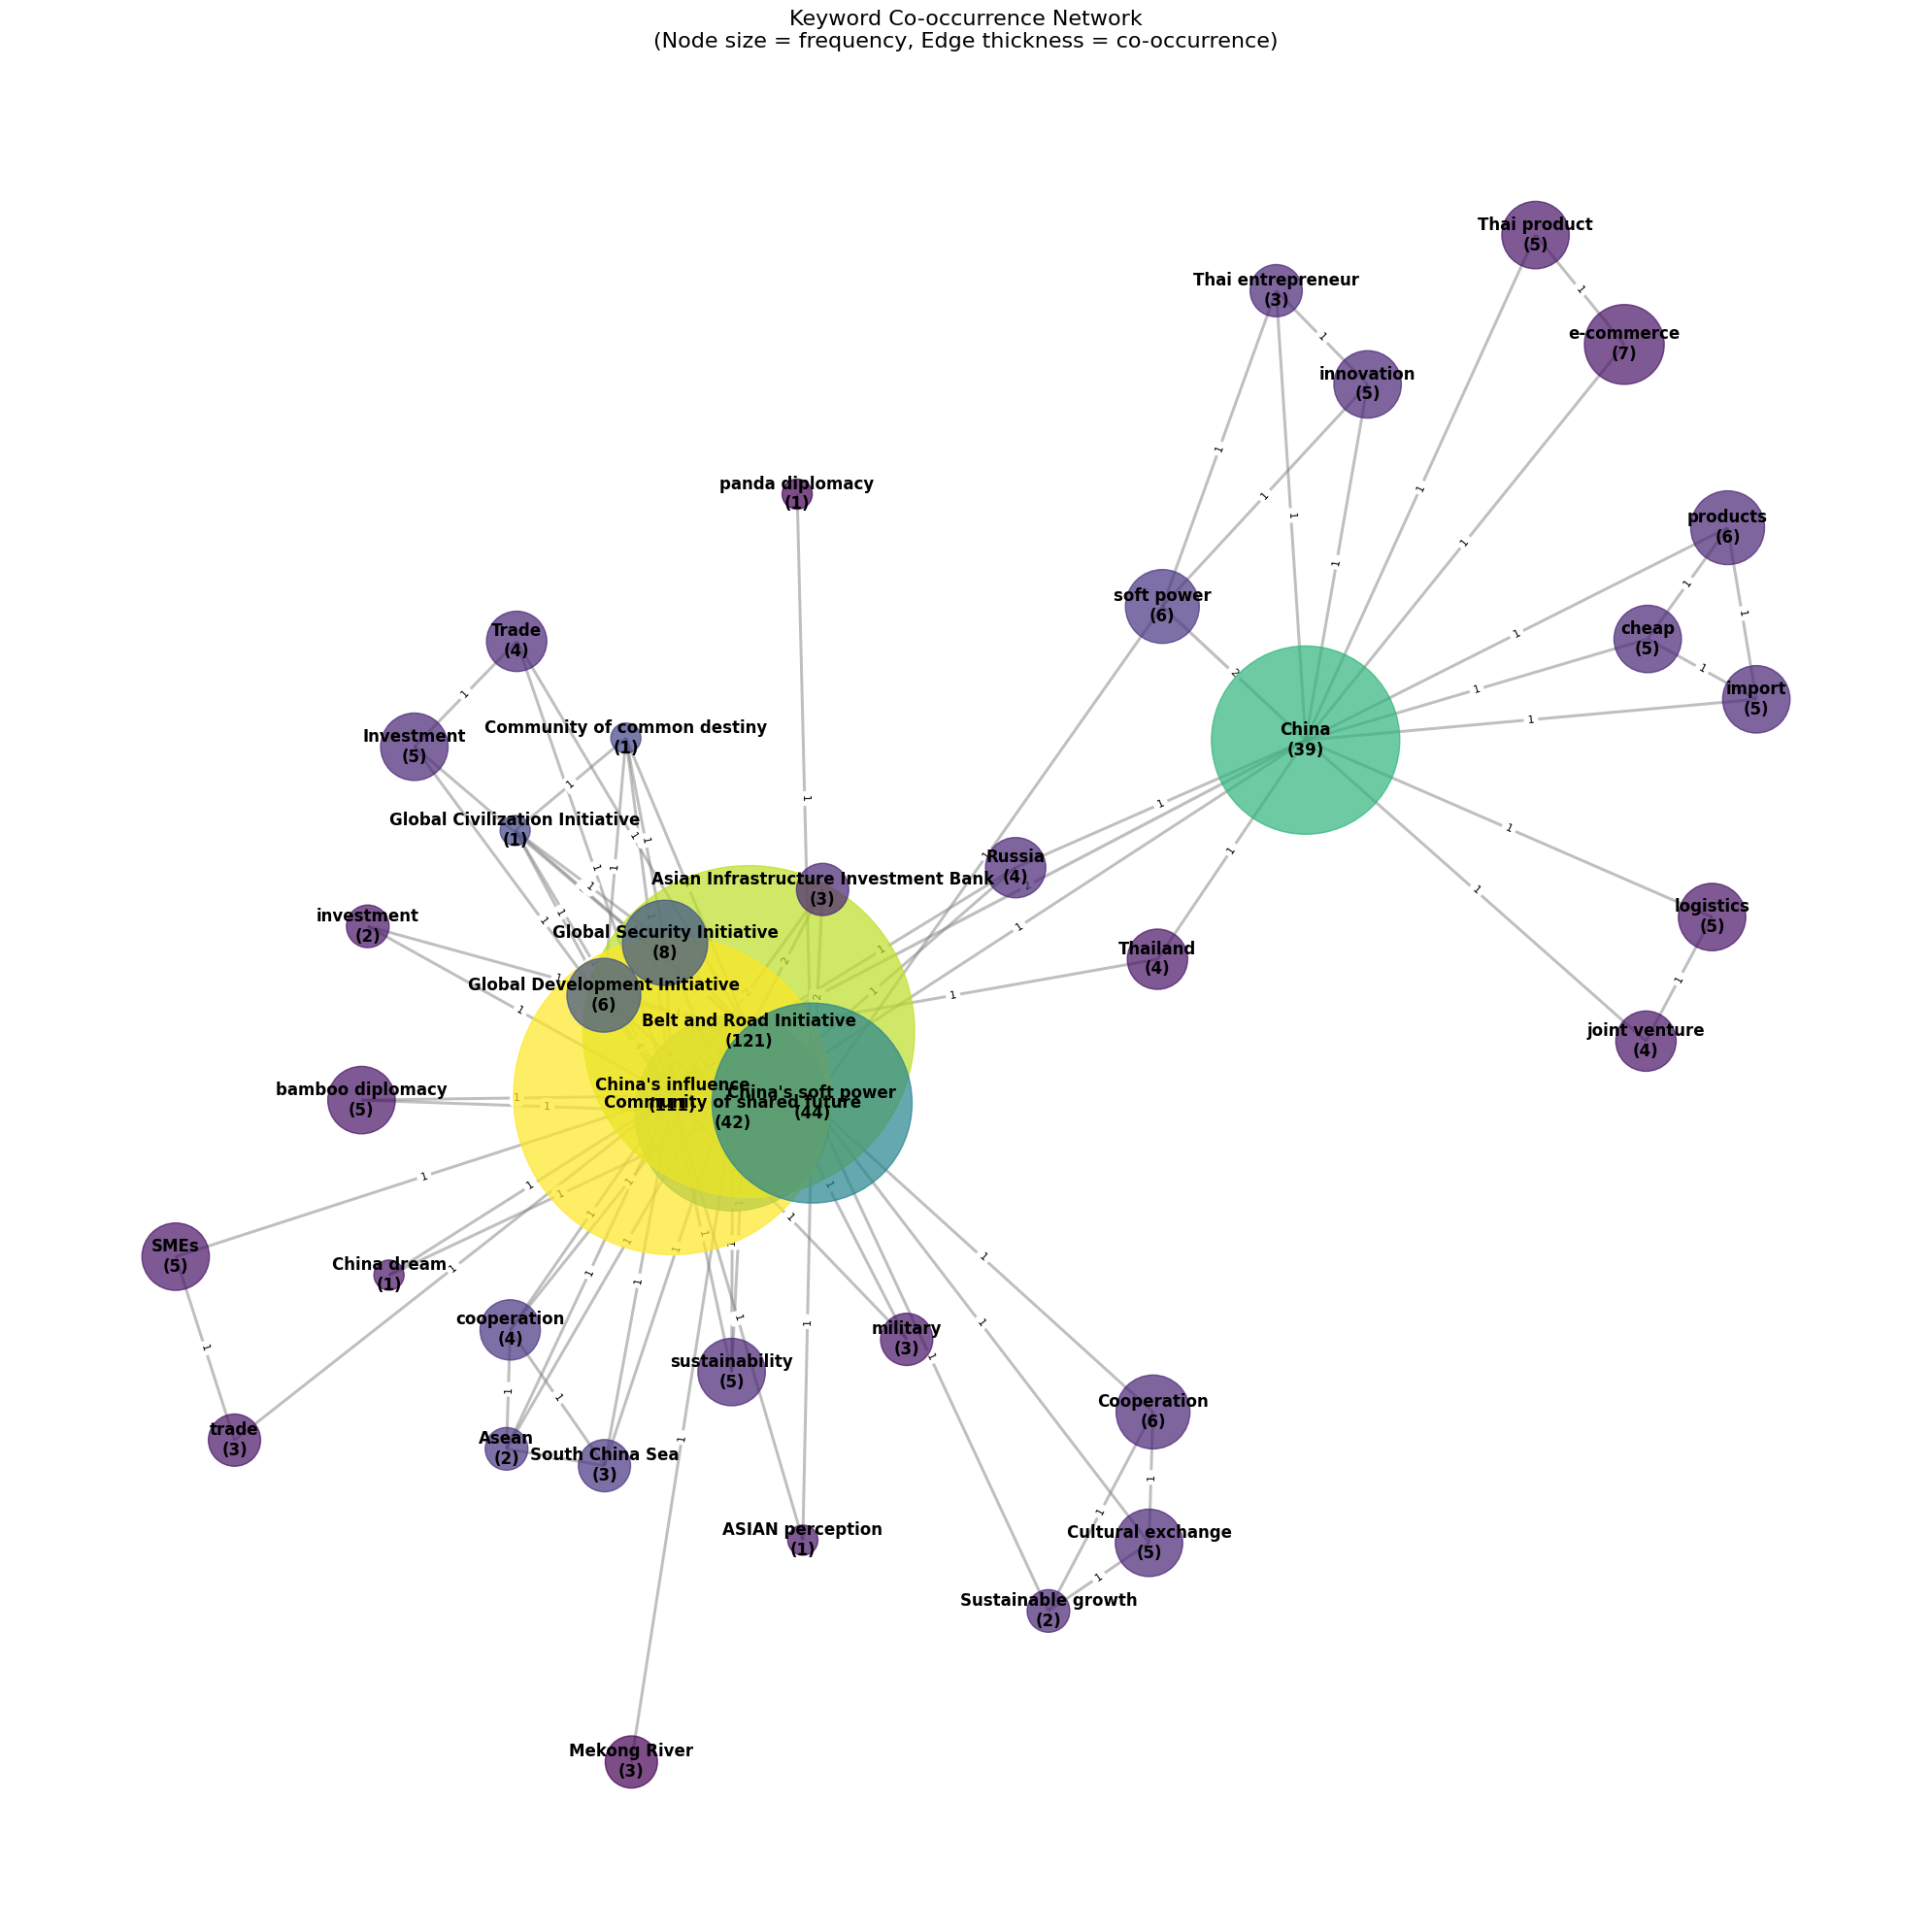

In [133]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph
G = nx.Graph()

def extract_keyword_and_count(item):
    if isinstance(item, list) and len(item) == 2:
        return item[0], item[1]
    elif isinstance(item, dict):
        if 'keyword' in item and 'count' in item:
            return item['keyword'], item['count']
        else:
            key = list(item.keys())[0]
            return key, item[key]
    return None, None

# Add nodes and edges with weights
keyword_counts = {}  # To store total occurrences of each keyword
for keywords in df['main_keywords']:
    if not isinstance(keywords, list):
        continue
        
    valid_keywords = []
    for item in keywords:
        keyword, count = extract_keyword_and_count(item)
        if keyword and count > 0:  # Only add keywords with count > 0
            valid_keywords.append((keyword, count))
            G.add_node(keyword)
            keyword_counts[keyword] = keyword_counts.get(keyword, 0) + count
    
    for i in range(len(valid_keywords)):
        for j in range(i + 1, len(valid_keywords)):
            keyword1, _ = valid_keywords[i]
            keyword2, _ = valid_keywords[j]
            
            if G.has_edge(keyword1, keyword2):
                G[keyword1][keyword2]['weight'] += 1
            else:
                G.add_edge(keyword1, keyword2, weight=1)

# Remove nodes with 0 occurrences
nodes_to_remove = [node for node, count in keyword_counts.items() if count == 0]
G.remove_nodes_from(nodes_to_remove)

# Create the visualization
plt.figure(figsize=(20, 20))

# Use circular layout
pos = nx.spring_layout(G)

# Calculate node sizes based on keyword frequency
node_sizes = [keyword_counts.get(node, 0) * 500 for node in G.nodes()]

# Calculate edge weights for thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [2 + (w / max_weight) * 8 for w in edge_weights]

# Calculate node colors based on degree centrality
node_color = list(nx.degree_centrality(G).values())

# Draw the network
# 1. Draw edges
nx.draw_networkx_edges(G, pos, 
                      width=normalized_weights,
                      edge_color='gray',
                      alpha=0.5)

# 2. Draw nodes
nodes = nx.draw_networkx_nodes(G, pos,
                             node_size=node_sizes,
                             node_color=node_color,
                             cmap=plt.cm.viridis,
                             alpha=0.7)

# 3. Draw labels with varying font sizes
labels = {node: f"{node}\n({keyword_counts[node]})" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, 
                       labels=labels,
                       font_size=12,
                       font_weight='bold')

# 4. Add edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos,
                           edge_labels=edge_labels,
                           font_size=8)

# Add title and remove axes
plt.title('Keyword Co-occurrence Network\n(Node size = frequency, Edge thickness = co-occurrence)',
          fontsize=16, pad=20)
plt.axis('off')

# Print network statistics
print("\nNetwork Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nTop 5 most frequent keywords:")
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
for keyword, count in sorted_keywords[:5]:
    print(f"{keyword}: {count} occurrences")

print("\nMost common co-occurrences:")
sorted_edges = sorted(G.edges(data=True), 
                     key=lambda x: x[2]['weight'], 
                     reverse=True)
for edge in sorted_edges[:5]:
    print(f"{edge[0]} - {edge[1]}: {edge[2]['weight']} co-occurrences")

plt.tight_layout()
plt.show()

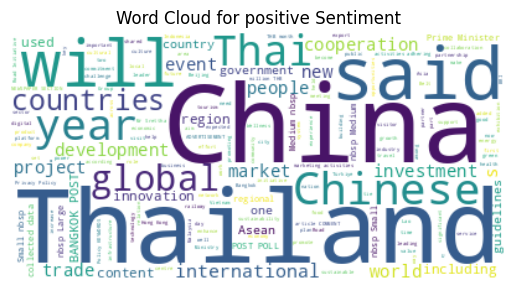

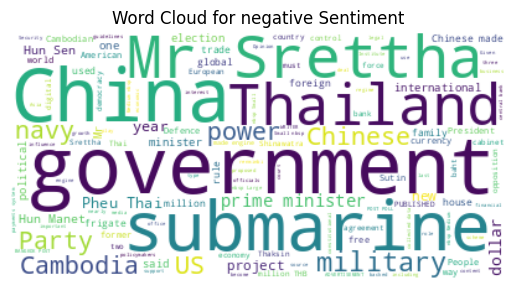

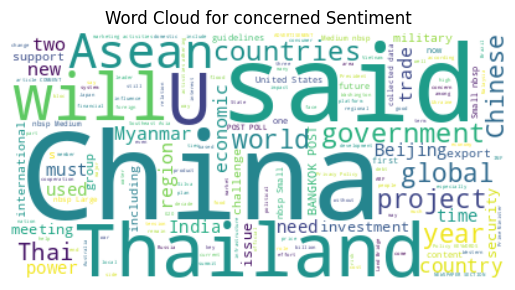

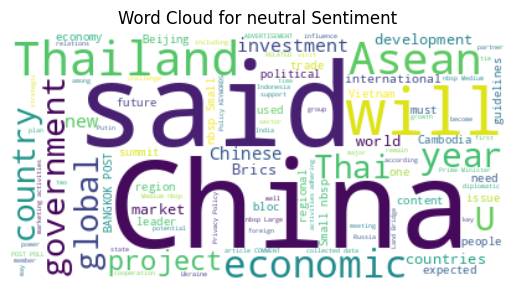

In [134]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

def create_wordcloud(sentiment):
    text = " ".join(article for article in df[df['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

create_wordcloud('positive')
create_wordcloud('negative')
create_wordcloud('concerned')
create_wordcloud('neutral')

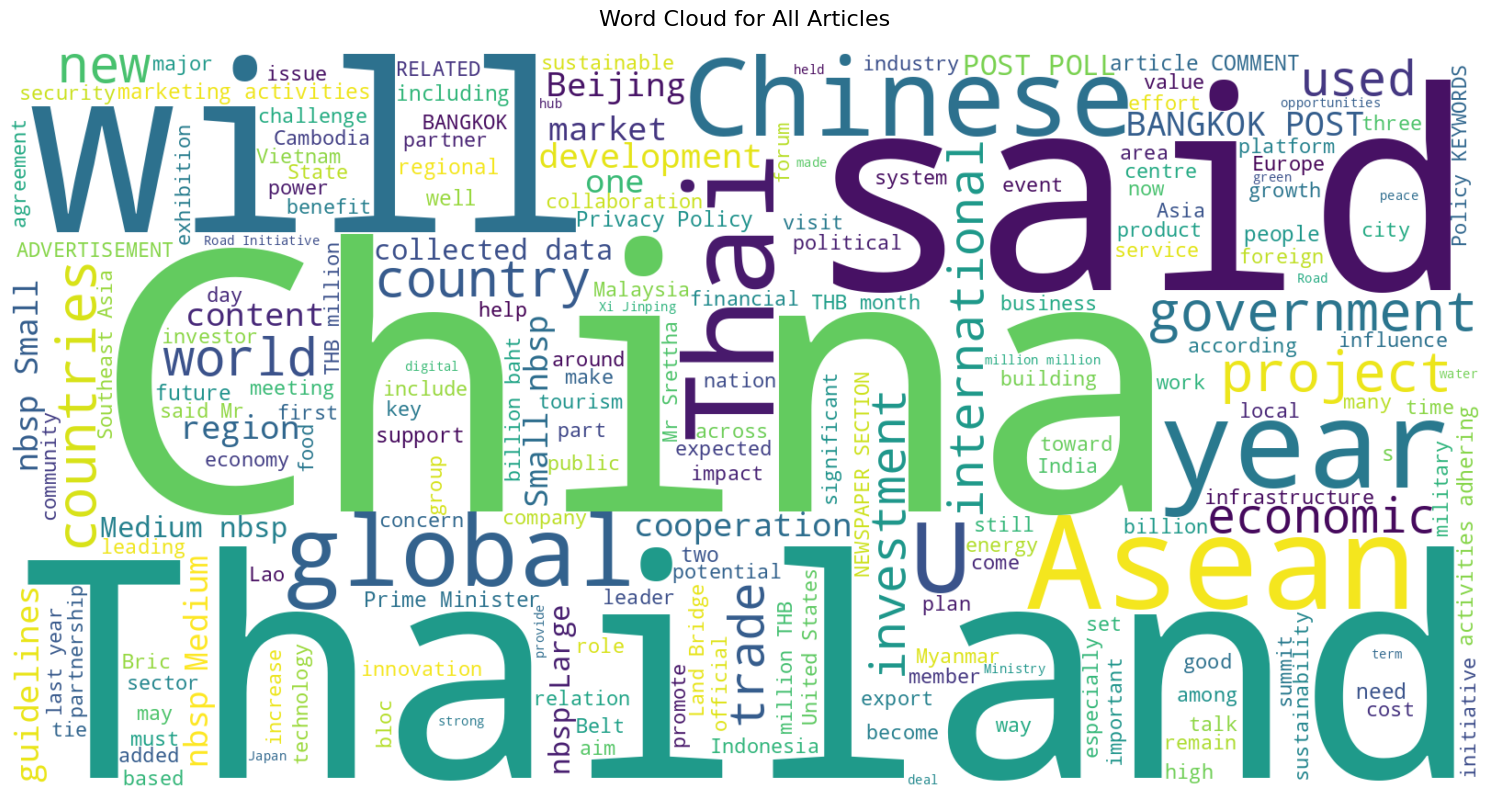

In [135]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all article content into one text
all_text = " ".join(article for article in df['content'])

# Create and display wordcloud
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(
    background_color="white",
    width=1600,
    height=800,
    max_words=200,
    contour_width=3
).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for All Articles", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [136]:
df['article_type'].value_counts()

article_type
Medium News      75
In-depth News    66
Commentary       41
Interview         2
Short News        1
Name: count, dtype: int64

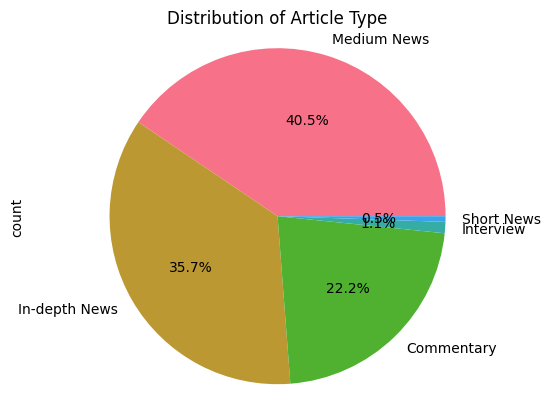

In [137]:
# pie chart for article type
df['article_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Article Type')
plt.axis('equal')
plt.show()


In [138]:
with open('url_list_st.json', 'r', encoding='utf-8') as f:
    url_list = json.load(f)



FileNotFoundError: [Errno 2] No such file or directory: 'url_list_st.json'

In [70]:
# filter the date
url_list = [item for item in url_list if datetime.strptime(item['date'], '%Y-%m-%d') >= datetime(2023, 9, 1)]
print(len(url_list))

80
